In [20]:
# 1. Importação das bibliotecas necessárias
# Bibliotecas gerais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

from modelos import *


In [21]:
def carregar_e_preparar_dados(caminho_csv, coluna_target):
    """
    Função para carregar o dataset e separar em X (features) e y (rótulo).

    Args:
    - caminho_csv: caminho do arquivo CSV
    - coluna_target: nome da coluna que representa o rótulo

    Returns:
    - X_train, X_test, y_train, y_test: conjuntos de treino e teste
    """

    cols = ['NU_ANO','TP_FAIXA_ETARIA', 'TP_DEPENDENCIA_ADM_ESC', 
        'NPessoas', 'Escolaridade_Pai', 'Escolaridade_Mae', 'Renda', 'Computador',
        'Celular', 'Internet', f'{coluna_target}']

    #selecionando as colunas relevantes
    cols = ['NU_ANO','TP_FAIXA_ETARIA', 'TP_DEPENDENCIA_ADM_ESC', 
        'NPessoas', 'Escolaridade_Pai', 'Escolaridade_Mae', 'Renda', 'Computador',
        'Celular', 'Internet', f'{coluna_target}']

    df = pd.read_csv(caminho_csv, sep=',', usecols=cols)
    df = df[df['NU_ANO']> 2021]
    df = df.drop(columns=['NU_ANO'])

    oneHotdata = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
    oneHotdata = oneHotdata.fit_transform(df[['TP_DEPENDENCIA_ADM_ESC']])
    df = pd.concat([df, oneHotdata], axis=1)
    df = df.drop(columns=['TP_DEPENDENCIA_ADM_ESC'])
    novos_nomes = {
        'TP_DEPENDENCIA_ADM_ESC_1': 'Federal',
        'TP_DEPENDENCIA_ADM_ESC_2': 'Estadual',
        'TP_DEPENDENCIA_ADM_ESC_3': 'Municipal',
        'TP_DEPENDENCIA_ADM_ESC_4': 'Privada',
    }
    df.rename(columns=novos_nomes, inplace=True)


    # Separando variáveis independentes e dependente
    X = df.drop(columns=[coluna_target])
    y = df[coluna_target]

    # Dividindo em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    #Normalização
    scaler = MinMaxScaler()
    X_train['TP_FAIXA_ETARIA'] = scaler.fit_transform(X_train[['TP_FAIXA_ETARIA']])
    X_test['TP_FAIXA_ETARIA'] = scaler.transform(X_test[['TP_FAIXA_ETARIA']])   #aqui não vai o fit, pois o teste não pode colar do treino
                    
    X_train['Renda'] = scaler.fit_transform(X_train[['Renda']])
    X_test['Renda'] = scaler.transform(X_test[['Renda']])   #aqui não vai o fit, pois o teste não pode colar do treino
                    
    X_train['NPessoas'] = scaler.fit_transform(X_train[['NPessoas']])
    X_test['NPessoas'] = scaler.transform(X_test[['NPessoas']])   #aqui não vai o fit, pois o teste não pode colar do treino
              
    X_train['Escolaridade_Mae'] = scaler.fit_transform(X_train[['Escolaridade_Mae']])
    X_test['Escolaridade_Mae'] = scaler.transform(X_test[['Escolaridade_Mae']])   #aqui não vai o fit, pois o teste não pode colar do treino

    X_train['Escolaridade_Pai'] = scaler.fit_transform(X_train[['Escolaridade_Pai']])
    X_test['Escolaridade_Pai'] = scaler.transform(X_test[['Escolaridade_Pai']])   #aqui não vai o fit, pois o teste não pode colar do treino


    return X_train, X_test, y_train, y_test, df

In [22]:
file = 'Data/enem_2011_2023.csv'  # Substitua pelo caminho do seu arquivo CSVASD

X_train, X_test, y_train, y_test, df = carregar_e_preparar_dados(file, 'Desempenho')
X_train

,TP_FAIXA_ETARIA,NPessoas,Escolaridade_Pai,Escolaridade_Mae,Renda,Computador,Celular,Internet,Federal,Estadual,Municipal,Privada
227925,0.166667,0.210526,0.666667,0.666667,0.050,0,1,1,0.0,1.0,0.0,0.0
252106,0.166667,0.210526,0.166667,0.166667,0.000,0,1,0,0.0,1.0,0.0,0.0
251310,0.055556,0.157895,0.666667,0.666667,0.050,0,1,1,0.0,1.0,0.0,0.0
232174,0.166667,0.052632,0.333333,0.333333,0.050,0,1,0,0.0,1.0,0.0,0.0
235572,0.111111,0.105263,0.666667,0.666667,0.200,1,1,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
257698,0.111111,0.105263,0.833333,0.666667,0.075,0,1,0,1.0,0.0,0.0,0.0
233286,0.055556,0.263158,0.666667,0.166667,0.050,0,1,1,0.0,1.0,0.0,0.0
228756,0.111111,0.157895,0.500000,0.500000,0.075,0,1,1,1.0,0.0,0.0,0.0
243691,0.111111,0.052632,0.666667,0.833333,0.100,0,1,1,0.0,1.0,0.0,0.0


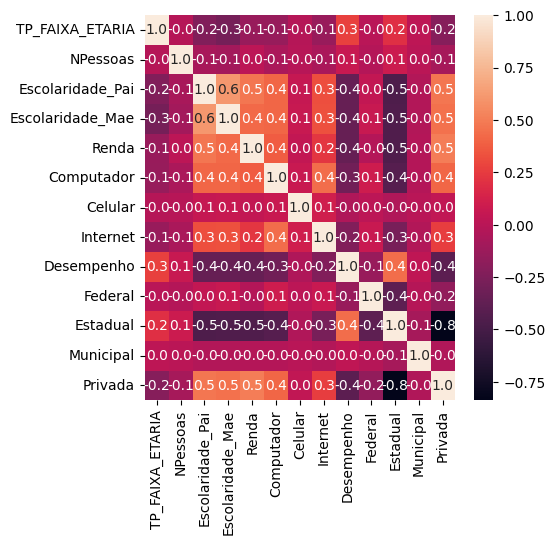

In [4]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

### PRIMEIRO VEJO AQUI, QUAL A PROFUNDIDADE IDEAL PARA NÃO OCORRER OVERFIT

max_depth tested:  1  2  

c:\GitMaria\MachineLearning\FinalProject\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


3  4  5  6  7  8  9  10  11  12  13  14  

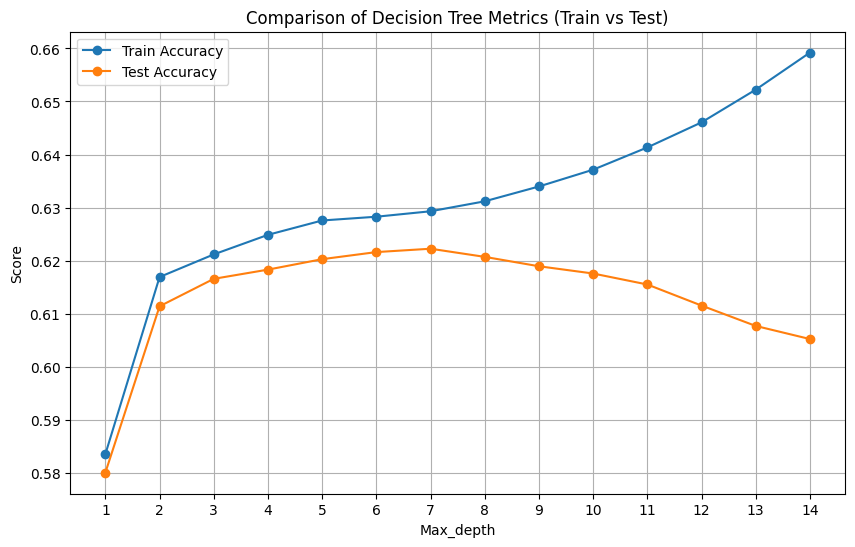

Best max_depth_tree: 7
Metrics for best max_depth: {'train_accuracy': 0.6293217724790529, 'test_accuracy': 0.6222696501817454, 'precision': 0.6184523604104577, 'recall': 0.6222696501817454, 'f1': 0.5802996554934081}


(7,
 {'train_accuracy': 0.6293217724790529,
  'test_accuracy': 0.6222696501817454,
  'precision': 0.6184523604104577,
  'recall': 0.6222696501817454,
  'f1': 0.5802996554934081})

In [5]:
best_depth_for_tree(X_train, X_test, y_train, y_test)

### APLICANDO  A ÁRVORE

Árvores de decisão nos ajudam a visualizar dados linearmente não separáveis

Árvore de Decisão Otimizada
Melhor alpha: 0.0020150466534824114
Ein: 0.3831
Eout: 0.3886

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.50      0.38      0.43      4071
           1       0.63      0.80      0.71     17396
           2       0.58      0.33      0.42      8520

    accuracy                           0.61     29987
   macro avg       0.57      0.50      0.52     29987
weighted avg       0.60      0.61      0.59     29987

A profundidade da árvore para o melhor alpha é: 3


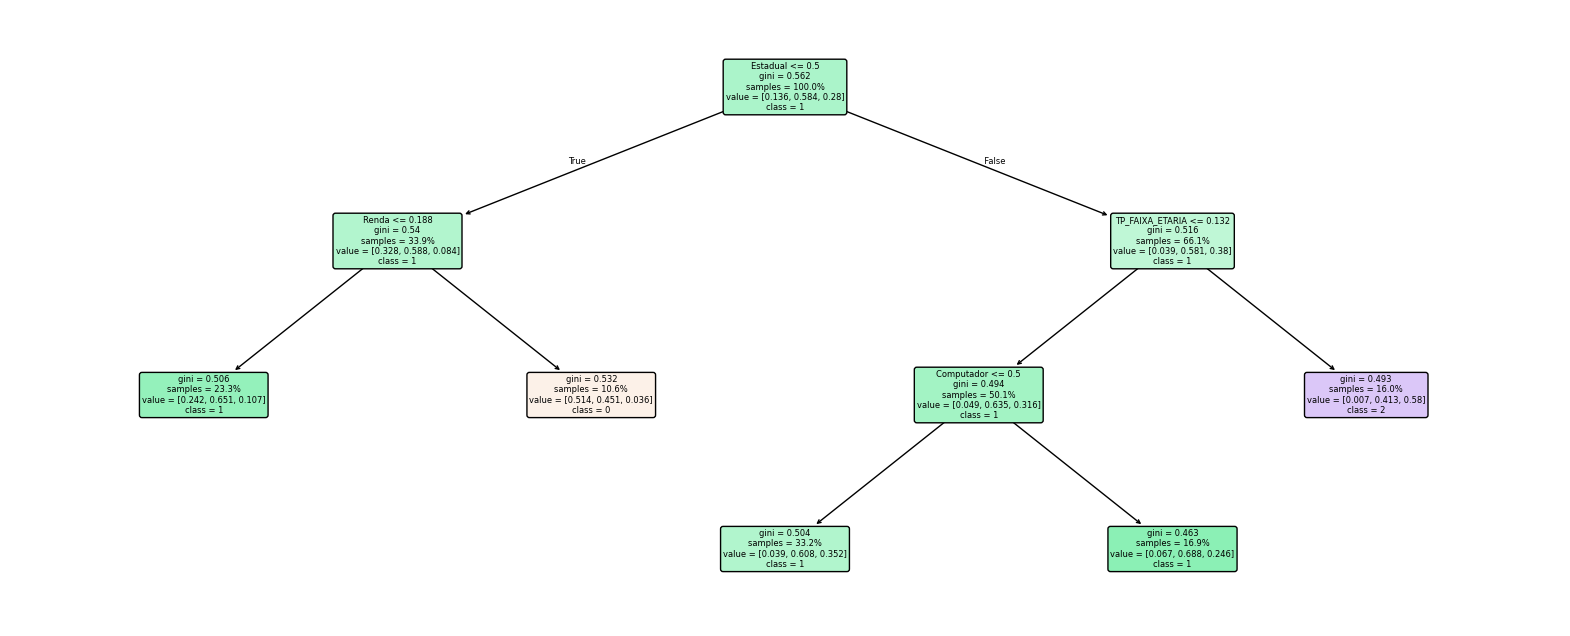

DecisionTreeClassifier(ccp_alpha=np.float64(0.0020150466534824114),
                       random_state=0)

In [6]:
modelo_arvore_decisao(X_train, X_test, y_train, y_test)

# SVM

SVM - Resultados
Melhores parâmetros: {'C': 10, 'gamma': 0.1}
Erro de treino (Ein): 0.3863
Erro de teste (Eout): 0.3919
Número total de vetores de suporte: 18745

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.45      0.52      1419
           1       0.61      0.88      0.72      3412
           2       0.64      0.03      0.06      1252

    accuracy                           0.61      6083
   macro avg       0.62      0.46      0.43      6083
weighted avg       0.61      0.61      0.54      6083



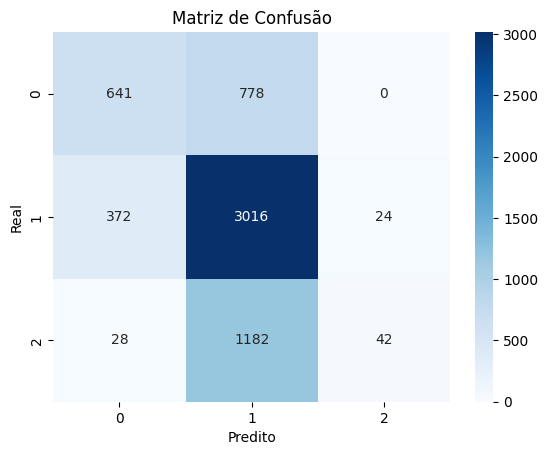

SVC(C=10, gamma=0.1, random_state=0)

In [26]:
modelo_svm(X_train, X_test, y_train, y_test)

# REDES NEURAIS

Usamos o cálculo da dimensão VC para justificar a escolha da arquitetura da Rede Neural: 
    - Nº de Camadas
    - Nº de Neurônios
    

Cálculo do Nº de Neurônios:


In [23]:
def num_neurons(n_examples, n_features):
    return int((n_examples - 10) / (10 * (n_features + 2) ))

In [24]:
N = len(X_train)
n_variaveis = X_train.shape[1]
print(X_train.shape)

print('Nº máximo de neurônios:')
print(num_neurons(N, n_variaveis))

(24332, 12)
Nº máximo de neurônios:
173


c:\GitMaria\MachineLearning\FinalProject\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Rede Neural
Ein: 0.3757
Eout: 0.3830
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


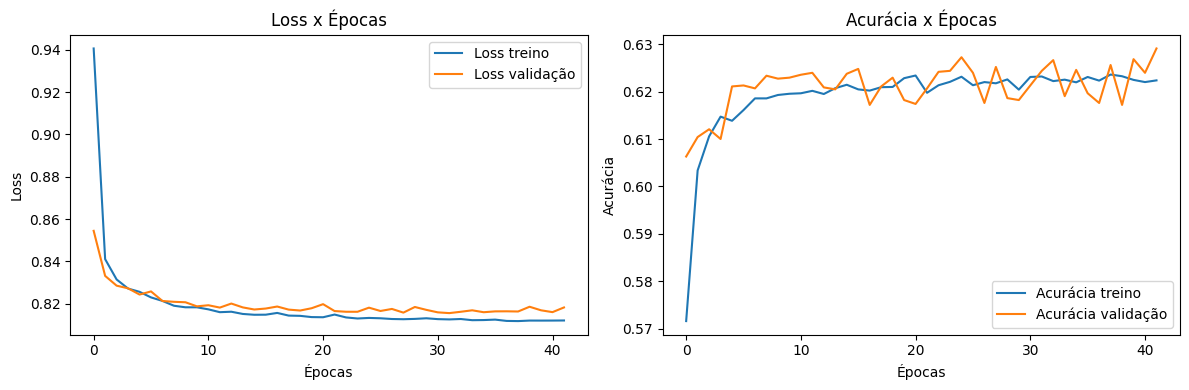


Métricas de Avaliação:
Acurácia de Treino: 0.6243
Acurácia de Teste: 0.6170
Ein: 0.3757
Eout: 0.3830
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.64      0.41      0.50      1419
           1       0.61      0.89      0.72      3412
           2       0.65      0.11      0.19      1252

    accuracy                           0.62      6083
   macro avg       0.63      0.47      0.47      6083
weighted avg       0.63      0.62      0.56      6083



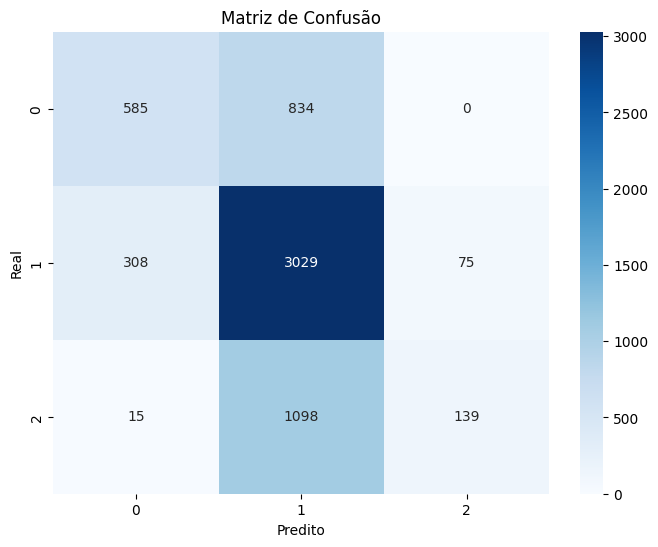

<Sequential name=sequential_1, built=True>

In [25]:
input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))
n_neuronios = 90
modelo_rede_neural(X_train, X_test, y_train, y_test, input_dim, output_dim, n_neuronios)